# <b style = "color:blue"> PREDICTION USING DECISION TREE ALGORITHM </b>

# Executed By Godspower Uyanga(DS/ML Engineer)

#  <b style = "color:blue"> AIM </b>
<b>Creating a Decision Classifier and Visualizing It Graphically with aim of feeding any new data to this classifier in order to predict right class accordingly</b>

# <b style = "color:blue" > WORK FLOW     (METHODOLOGY) </b>
- Data Collection
- Exploratory Data Analysis(EDA)
- Data Preprocessing
- Data Splitting / Training
- Model Selection
- Analysis/Evaluation
- Visualization Of Decision Tree Classifier


# <b style = "color: blue" > Importing Dependencies </b>

In [91]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Models
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Step 1  <b style = "color:blue"> Data Collection </b>

In [2]:
# Loading Iris Data
iris_data = pd.read_csv("Iris_data.csv")

# Step 2 <b style = "color: blue"> Exploratory Data Analysis(EDA) </b>

### Perusing The First 5 Rows Of Our Data

In [3]:
# Checking The First 5 Rows Of Our Data
print("---------------   The First 5 Rows Of Our Data Is Shown Below      ------------------------------")
iris_data.head()

---------------   The First 5 Rows Of Our Data Is Shown Below      ------------------------------


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Perusing The Last 5 Rows Of Our Data

In [4]:
# Checking The Last 5 Rows Of the Data
print("-------------------  The Last 5 Rows Of Our Data Is Shown Below -----------------------------")
iris_data.tail()

-------------------  The Last 5 Rows Of Our Data Is Shown Below -----------------------------


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Knowing The Shape Of  the Data

In [5]:
# Checking The Shape Of The Data
print ("............The Shape Of Our Data Is Shown Below   ...................\n")
print(f"Iris Dataset Has {iris_data.shape} Rows And Columns")

............The Shape Of Our Data Is Shown Below   ...................

Iris Dataset Has (150, 6) Rows And Columns


### Examining The Species Column

In [6]:
# Lets Peruse The Species Column Of Our Iris data
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Analyzing And Checking  Incase Of Any Hidden Null Value

In [7]:
# Lets Check If They Is Any Null Value

iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking For Data Type

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Descriptive Statistics Of The Data

In [9]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Using Correlation Matrix To Peruse The Correlation Of The Data

In [10]:
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# <b style = "color:blue"> INFERENCE FROM EXPLORATORY DATA ANALYSIS(EDA) </b>
- Notice That We Have 150 Rows And 6 Columns, and we need to drop the ID column since it does not have much correlation on the Data
- Notice That The Column Labels Are Not Uniquely labelled And We Need To Rename Them During Our Data Preprocessing Stage
- They Is No Null Value In The Data
- The Species Are Divided Into 3 Class And Has 50 Unique Values Accordingly

# Step 3 <b style = "color:blue"> Data Preprocessing </b>

### Dropping The Id Column

In [11]:
iris_data.drop(["Id"], axis =1, inplace = True)

### Check The First 5 Rows Of Our Data To Confirm That Id Data Is Removed From The Column

In [12]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Renaming The Column

In [13]:
iris_data.rename(columns = {"SepalLengthCm": "Sepal Length(cm)","SepalWidthCm":"Sepal Width(cm)", "PetalLengthCm":"Petal Length(cm)","PetalWidthCm":"Petal Width(cm)"}, inplace = True)

### Lets Confirm If Our Column Is Renamed

In [14]:
iris_data.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Encoding

## Applying Label Encoding To The Species

#### Importing Label Encoding Library

In [15]:
from sklearn.preprocessing import LabelEncoder

#### Loading The Label Encoder

In [16]:
label_encoder = LabelEncoder()

#### Peruse The Species 

In [17]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Applying Label Encoder

In [18]:
iris_labels = label_encoder.fit_transform(iris_data.Species)

#### Add a New Column Called Target To the Iris Data 

In [19]:
iris_data["Target"] = iris_labels

#### Confirming That The New Column Is Added To Our Data

In [20]:
iris_data.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [21]:
iris_data[ "Target"].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

# Data Visualization

### Visualizing The Skewness Of Our Iris Data

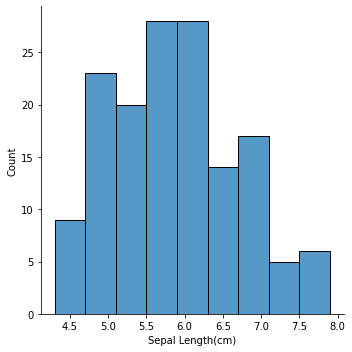

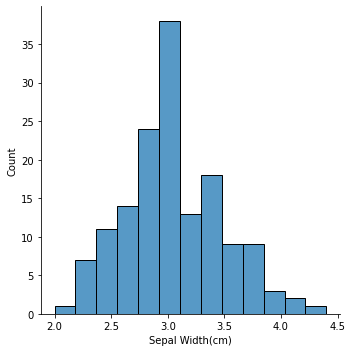

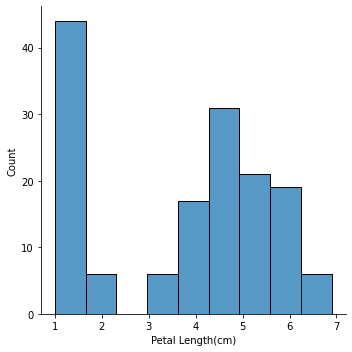

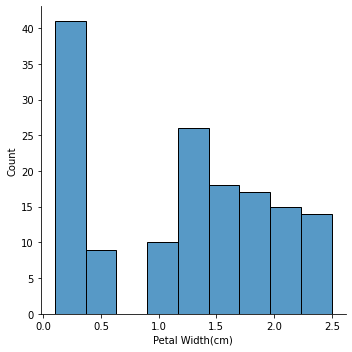

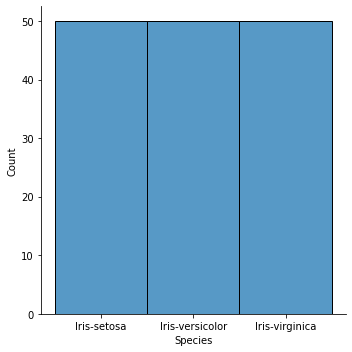

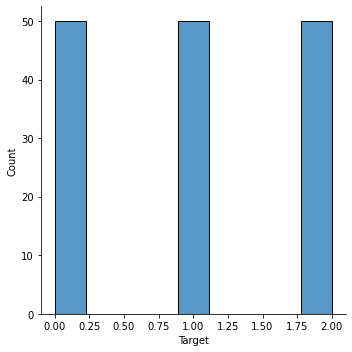

In [22]:
for Column in iris_data:
    sns.displot(x = Column, data = iris_data)

### Using Pairplot To Visualize The Relationships Between Variables In Our Iris Data

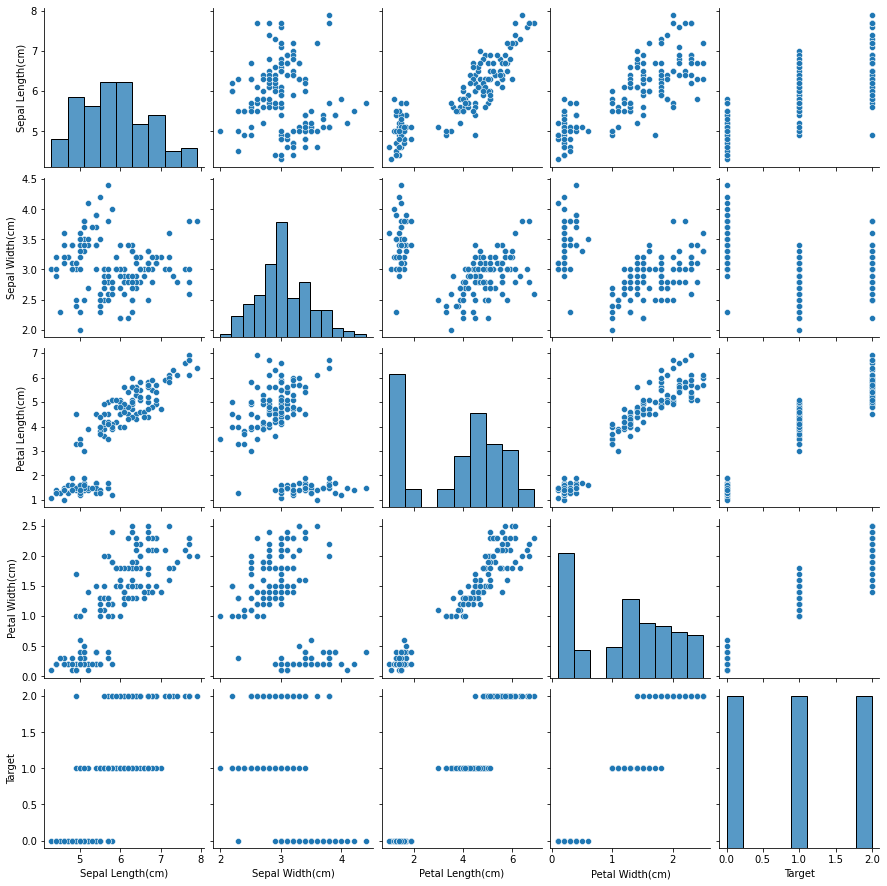

In [23]:
sns.pairplot(iris_data);

#### Visual To Show The Uniqueness Of Our Species

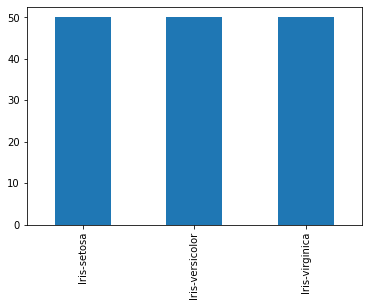

In [24]:
iris_data["Species"].value_counts().plot(kind ="bar");

### Heat Map That Shows The Correlation Of Our Iris Data

------------------   The Heat Map Below Shows The Correlation Of Our Iris Data -------------



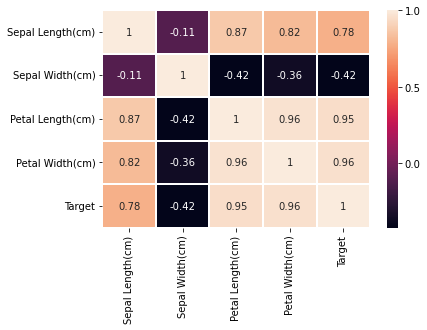

In [25]:
print("------------------   The Heat Map Below Shows The Correlation Of Our Iris Data -------------\n")

sns.heatmap(iris_data.corr(), annot =True, linewidths=.10)
plt.rcParams['font.size'] = 20
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (13,5)
plt.show()

### Scatter Plot To Visualize Relationships

In [26]:
%matplotlib inline

In [27]:
df0 = iris_data[iris_data.Target == 0]
df1 = iris_data[iris_data.Target == 1]
df2 = iris_data[iris_data.Target == 2]

In [28]:
df0.shape, df1.shape, df2.shape

((50, 6), (50, 6), (50, 6))

In [29]:
iris_data.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


### Visualizing The Relationship Between Sepal Length And Sepal Width

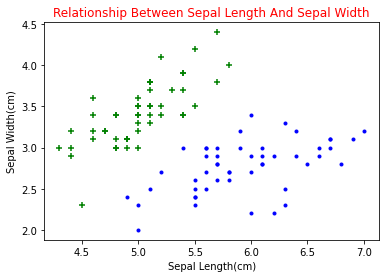

In [30]:
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.title("Relationship Between Sepal Length And Sepal Width", color = "red")
plt.scatter(df0["Sepal Length(cm)"], df0["Sepal Width(cm)"], color = "green", marker = "+");
plt.scatter(df1["Sepal Length(cm)"], df1["Sepal Width(cm)"], color = "blue", marker = ".");

### Visualizing The Relationship Between Petal Length And Petal Width

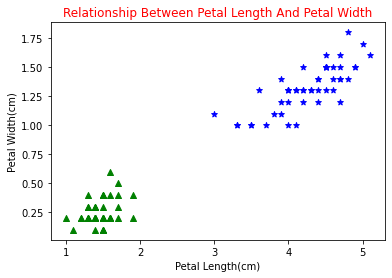

In [31]:
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.title("Relationship Between Petal Length And Petal Width", color = "red")
plt.scatter(df0["Petal Length(cm)"], df0["Petal Width(cm)"], color = "green", marker = "^");
plt.scatter(df1["Petal Length(cm)"], df1["Petal Width(cm)"], color = "blue", marker = "*");

# <b style = "color:blue"> INFERENCE FROM DATA VISUALIZATION </b>
- We Noticed That Our Species Is Balanced And are Uniquely Distributed(50 * 50 * 50)
- Sepal Width(cm) And Sepal Width(cm)  Are Normally Distributed i.e No Skewed
- Petal Width And Petal Length Are Negatively Skewed
- Sepal Width(cm) And Sepal Length (cm) Are Highly Correlated
- Petal length(cm) And Sepal Width(cm)  Are Highly Correlated
- Petal Width and Sepal Width Are Highly Correlated

# Step 4 <b style = "color:blue"> DATA SPLITTING </b>

## Importing And Training Our Model

### Splitting Features From Target

#### Creating Feature For Training

In [32]:
X = iris_data.drop(["Target","Species"], axis = 1)

#### Lets Peruse Our Features

In [33]:
X.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Creating The Target 

In [34]:
y = iris_data["Target"]

#### Perusing The Target

In [35]:
y.value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

### Data Standardization

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X)

StandardScaler()

In [38]:
Standardize_data = scaler.transform(X)

In [39]:
print(Standardize_data)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

#### Applying Train Test Split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [41]:
print(".... Notice That 70% Of The Data Is For Training And 30% Is For Testing .............")
X.shape,X_train.shape,X_test.shape

.... Notice That 70% Of The Data Is For Training And 30% Is For Testing .............


((150, 4), (105, 4), (45, 4))

# IMPLEMENTING DECISON TREE ALGORITHM

In [46]:
model = DecisionTreeClassifier(random_state = 100)
model

DecisionTreeClassifier(random_state=100)

### Lets Train Our Model

In [48]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [77]:
iris_data.head(100)

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,5.1,2.5,3.0,1.1,Iris-versicolor,1


## Prediction

In [75]:
X = [[5.9, 3.0, 5.1, 1.8]]
y_predict = model.predict(X)
if(y_predict[0] == 0):
    print(y_predict)
    print("Iris-setosa")
elif(y_predict[0] > 0 and y_predict[0] < 2):
    print(y_predict)
    print("Iris-versicolor")
else:
    print(y_predict)
    print("Iris-virginica")

[2]
Iris-virginica


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
X = [[5.7,2.8,4.1,1.3]]
y_predict = model.predict(X)
if(y_predict[0] == 0):
    print(y_predict)
    print("Iris-setosa")
elif(y_predict[0] > 0 and y_predict[0] < 2):
    print(y_predict)
    print("Iris-versicolor")
else:
    print(y_predict)
    print("Iris-virginica")

[1]
Iris-versicolor


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [76]:
X = [[5.1, 3.5, 1.4, 0.2]]
y_predict = model.predict(X)
if(y_predict[0] == 0):
    print(y_predict)
    print("Iris-setosa")
elif(y_predict[0] > 0 and y_predict[0] < 2):
    print(y_predict)
    print("Iris-versicolor")
else:
    print(y_predict)
    print("Iris-virginica")

[0]
Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


 ## ACCURACY TEST

In [87]:
print("Our Model Accuracy Score Is :", accuracy_score(y_test,y_predict))

Our Model Accuracy Score Is : 0.9555555555555556


<b style = "color:blue"> Our Model Is 95% Accurate And Perform so well </b>

## Visual To Graphically show Our Decision Tree Classifier

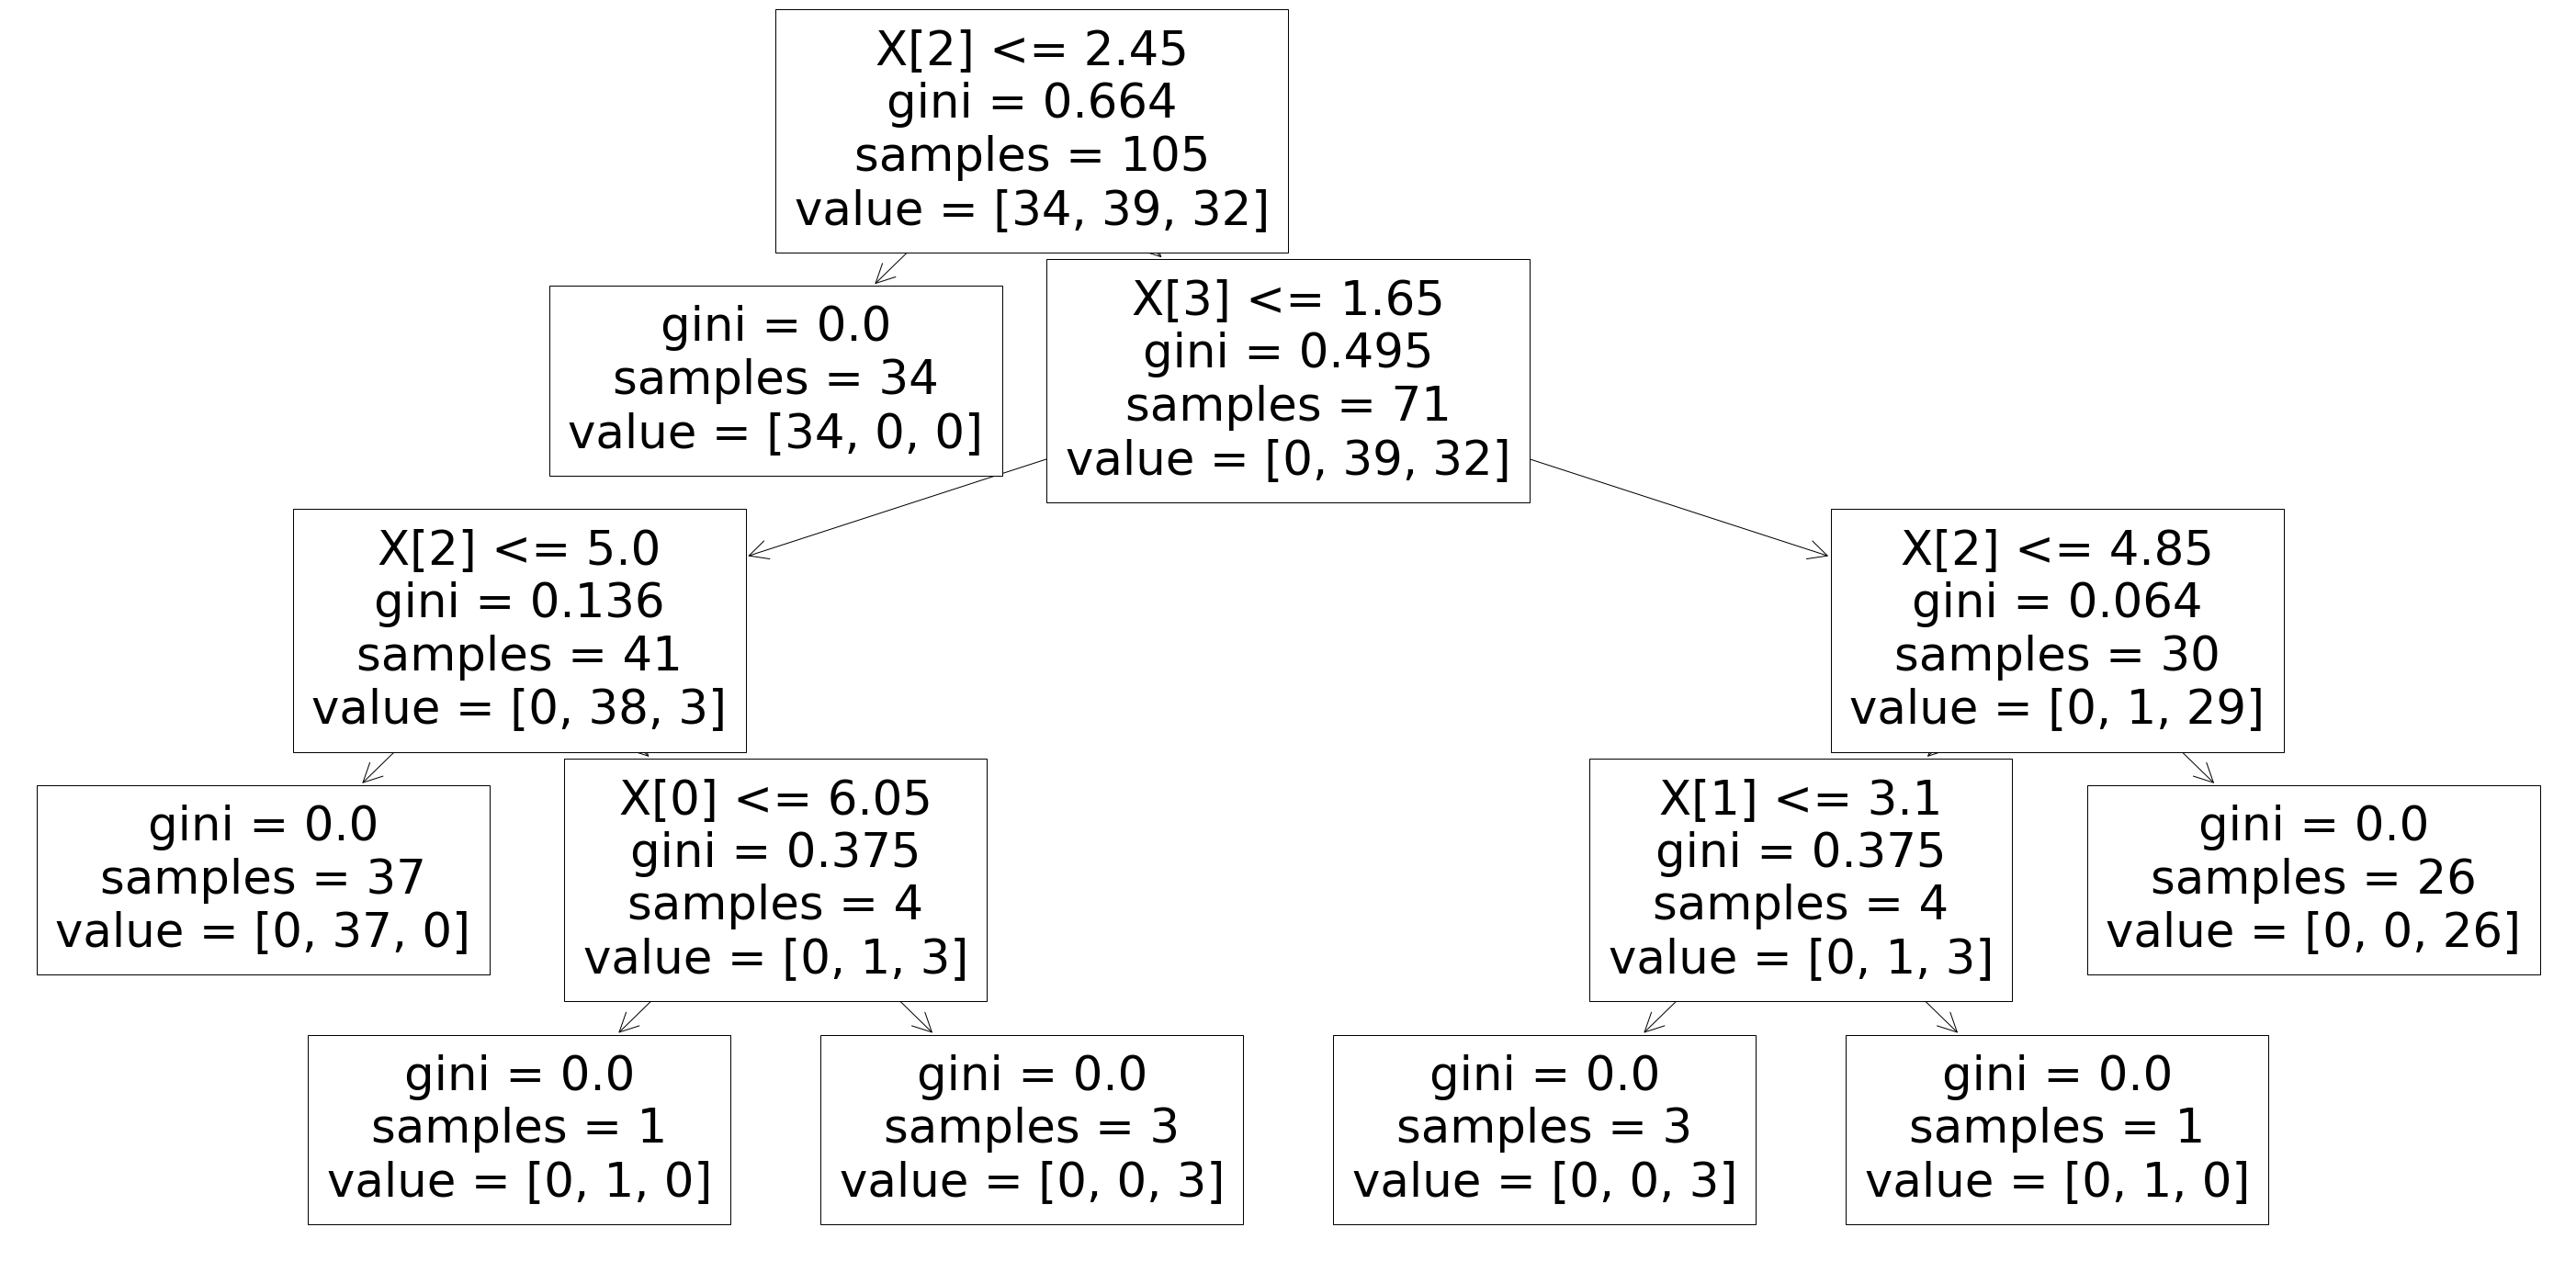

In [101]:
plt.subplots(figsize=(50, 25))
tree.plot_tree(model);

## Text Representation

In [102]:
text_presentation = tree.export_text(model)
print(text_presentation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## <b style ="color:blue">Summary </b>
<b>Finally We Have Created A Decision Tree Classifier, Visual It Graphically Feed It With New Data To Predict The Right Class Accordingly</b>